<a href="https://colab.research.google.com/github/Sachin070292/Play-Store-App-Review-Analysis/blob/main/Sachin_dubey_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

# **Play Store App Analysis**

Introduction to data

In [4]:
file_path ='/content/drive/MyDrive/Capston Dataset/'
Datafile = pd.read_csv(file_path + 'Play Store Data.csv')

In [5]:
# Copying  of dataframe
play_store_app = Datafile.copy()

In [6]:
play_store_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
play_store_app.shape

(10841, 13)

In [8]:
play_store_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# Checing  null vlaue in given Database 
play_store_app.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
play_store_app.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Data Cleaning Part 

In [11]:
# Shorting the usafull and rerqured coulms from Database 
shortlist_clm = play_store_app.columns.to_list()[:11]
shortlist_clm 

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated']

In [12]:
# play_store_app['App'].unique()

In [13]:
# Checing Unqiue Cataogery 
play_store_app['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [14]:
# As 1.9 is is not correct value in Cataogery column  finding row number 
play_store_app[play_store_app['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
# It seems that  1.9 wrongly  updated in Category columns insted of rasting and rarting value also incorrect 
play_store_app.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [16]:
play_store_app.loc[10472]= play_store_app.loc[10472].shift() 
play_store_app.loc[10472,'App']= play_store_app.loc[10472,'Category']
play_store_app.loc[10472,'Category']= np.nan

In [17]:
play_store_app.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [18]:
play_store_app['Rating'].unique() 

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [19]:
# here we have to convert the object to numeric
play_store_app['Rating'] = pd.to_numeric(play_store_app['Rating'])

In [20]:
play_store_app['Rating'].dtype

dtype('float64')

In [21]:
play_store_app.describe()

,Rating
count,9367.000000
mean,4.191513
std,0.515735
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [22]:
#     #replacing NaN to mode of rating column            
#The mode is the values that appears most often in a set of
mode= play_store_app['Rating'].mode()
play_store_app['Rating'].fillna(value= mode[0], inplace =True)

Reviews

In [23]:
play_store_app['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: object

In [24]:
# converting data type 
play_store_app['Reviews']=play_store_app['Reviews'].astype(float)  

Size

In [25]:
play_store_app['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [26]:
# conveting Size
def converting_MB_KB(Size):
  if 'Varies with device' in Size:
    return np.nan
  elif 'M'in Size:
    Size= Size.replace('M','000')
    return eval(Size)
  elif 'k' in Size:
    Size= Size.replace('k','')   
    return eval(Size)





In [27]:
play_store_app['Size']= play_store_app.apply(lambda x : converting_MB_KB(x['Size']), axis =1 )

In [28]:
play_store_app['Size'].dtype

dtype('float64')

install

In [29]:
play_store_app['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [30]:
# removing , & +
def converting_numuric(installs):
  if "+" in installs:
    installs = installs.replace('+','')

  elif ',' in installs:
    installs = installs.replace (',','')

  return installs   



In [33]:
play_store_app['Installs'] = play_store_app.apply(lambda x : converting_numuric(x['Installs']), axis = 1) 

In [34]:
play_store_app['Installs']= play_store_app['Installs'].astype(float)

price

In [ ]:
play_store_app['Price'].unique()

In [ ]:
# removing $ and convetitng in float 
play_store_app['Price'] = play_store_app['Price'].str.replace('$','').astype(float)


In [ ]:
play_store_app['Size']

Last Updated

In [ ]:
play_store_app['Last Updated']

In [ ]:
#changing date format
play_store_app['Last Updated']= pd.to_datetime(play_store_app['Last Updated'], format = '%B %d, %Y')


In [ ]:
play_store_app['Last Updated']

Duplicata App

In [ ]:
play_store_app['App'].value_counts()

In [ ]:
play_store_app[play_store_app['App']== 'ROBLOX']

In [ ]:
play_store_app[play_store_app['App']=='ESPN']

In [ ]:
# Dropping Duplicate value 
play_store_app.drop_duplicates(inplace =True)

In [ ]:
play_store_app[play_store_app['App']=='ESPN']

Correlation

In [ ]:
corr_app = play_store_app.corr()

In [ ]:
corr_app

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_app, annot = True, linewidths= 2.5,linecolor= 'yellow',cmap='viridis')

In [ ]:
# From the above heatmap, it can be concluded that installion of app affected by reviews
play_store_app.describe()

In [ ]:
# Average reviews across each category
app_category = play_store_app.groupby('Category')['Reviews'].mean().round(0).sort_values(ascending=False).reset_index()

In [ ]:
app_category[:5]

In [ ]:
# visualization
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x=app_category['Category'], y=app_category['Reviews'])
plt.xticks(rotation=80)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Reviews", fontsize=15)
plt.title("Category and Reviews", fontsize=25)

In [ ]:
#sorting dict by their values
sorted_top_category = dict(sorted(top_category.items(), key=lambda ctg: ctg[1], reverse=True))

In [ ]:
category_df = pd.DataFrame(list(sorted_top_category.items()), columns=['Category','Frequency'])

In [ ]:
#Top five app-category
category_df[:5]

In [ ]:
# visualization
plt.figure(figsize=(15,10))
sns.set_style('darkgrid')
sns.barplot(x=category_df['Category'], y=category_df['Frequency'],palette='magma')
plt.xticks(rotation=80)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top App's Category In Play Store", fontsize=25)

App installed according to category(Number of Installed applications for each category)

In [ ]:
#app_category_installs = play_store_app.groupby('Category')['Installs'].mean().round(0).sort_values(ascending=False).reset_index()
app_category_installs = play_store_app.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

In [ ]:
app_category_installs[:5]

In [ ]:
# visualization
plt.figure(figsize=(15,10))
plt.rcParams['figure.figsize'] = (15, 6)
sns.set_style('darkgrid')
sns.barplot(x=app_category_installs['Category'], y=app_category_installs['Installs'], palette= "viridis")
plt.xticks(rotation=80)
plt.xlabel("Category",fontsize=15)
plt.ylabel("Install", fontsize=15)
plt.title("Category and Install", fontsize=25)

Top app genres in play store(Count of apps in each genres)

In [ ]:
#frequency of app category
top_genres = {}
genres_list = list(play_store_app['Genres'].dropna())
for genres in genres_list:
  if genres in top_genres:
    top_genres[genres] += 1
  else:
    top_genres[genres] = 1  

In [ ]:
#sorting dict by their values
sorted_top_genres = dict(sorted(top_genres.items(), key=lambda genr: genr[1], reverse=True))

In [ ]:
genres_df = pd.DataFrame(list(sorted_top_genres.items()), columns=['Genres','Frequency']).head(25)

In [ ]:
genres_df[:5]

In [ ]:
# visualization
plt.figure(figsize=(15,10))
plt.rcParams['figure.figsize'] = (15, 6)
sns.set_style('darkgrid')
sns.barplot(x=genres_df['Genres'], y=genres_df['Frequency'],palette='deep')
plt.xticks(rotation=80)
plt.xlabel("Genres",fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Top App's Genres In Play Store", fontsize=25)

App installed according to genres(Number of Installed applications for each genres)

In [ ]:
#top ten genres
app_genres_installs = play_store_app.groupby('Genres')['Installs'].sum().sort_values(ascending=False).reset_index().head(10)

In [ ]:
app_genres_installs

In [ ]:
# visualization
plt.figure(figsize=(12,7))
plt.rcParams['figure.figsize'] = (15, 6)
sns.set_style('darkgrid')
sns.barplot(x=app_genres_installs['Genres'], y=app_genres_installs['Installs'], palette= "viridis")
plt.xticks(rotation=65)
plt.xlabel("Genres",fontsize=15)
plt.ylabel("Install", fontsize=15)
plt.title("Install according to genres", fontsize=25)

Percentage of Free Vs Paid Apps in Play store

In [ ]:
#percentage of paid and free app in play store
# free = play_store_app.loc[play_store_app['Type'] == 'Free','Type'].value_counts()
# paid = play_store_app.loc[play_store_app['Type'] == 'Paid','Type'].value_counts()
app_version = play_store_app['Type'].value_counts(sort=True)
app_levels = play_store_app['Type'].value_counts(sort=True).index

In [ ]:
# visualization
plt.figure(figsize=(15,8))
plt.rcParams['figure.figsize'] = (15, 6)
colors = ['#9172EC','orange']
explode = (0.2,0)
plt.pie(app_version, explode=explode, labels=app_levels, colors=colors, autopct='%1.1f%%',shadow=True, startangle = 90)
plt.title('Percentage of Free Vs Paid Apps in Play store',size = 20)
plt.legend()

From the above pie chart, it can be concluded that in the given dataset more number of apps are free

In [ ]:
#frequency of content rating in play store
content_rating_list = list(play_store_app['Content Rating'].dropna())
top_content_rating = {}
for cont_rating in content_rating_list:
  if cont_rating in top_content_rating:
    top_content_rating[cont_rating] += 1
  else:
    top_content_rating[cont_rating] = 1

In [ ]:
#sorting dict by their values
sorted_top_content_rating = dict(sorted(top_content_rating.items(), key=lambda ctg: ctg[1], reverse=True))

In [ ]:
content_rating_df = pd.DataFrame(list(sorted_top_content_rating.items()), columns=['Content Rating','Count Value'])

In [ ]:
#top content rating
content_rating_df

In [ ]:
# visualization
plt.figure(figsize=(15,10))
plt.bar(content_rating_df['Content Rating'], content_rating_df['Count Value'], width=0.5, color=['#15244C','#ff4873','#ff9748','#EF2920','#CD202D','#ECC5F2'],alpha=0.8)
plt.title('Content Rating',size = 25)
plt.ylabel('Apps(Count)',fontsize=15)
plt.xlabel('Content Rating', fontsize=15)

Content ratings are used to describe the minimum maturity level of content in apps. However, content ratings don't tell you whether an app is designed for users of a specific age.

Ratings are typically based on a number of factors, including sexual content, violence, drugs, gambling, and profane language.(Source:Google Play Help)



Distribution of App Rating

In [ ]:
plt.hist(play_store_app["Rating"])
plt.xlabel('Rating',fontsize =15)
plt.ylabel('Number of App installed', fontsize = 10)
plt.title('distrubution of Rating', fontsize = 15)

From the above histogram, it can be concluded that maximum number of applications installed which has rating lie between 4.2 to 4.5

Distribution of App Size

In [ ]:
plt.hist(play_store_app['Size'])
plt.xlabel("App's Size", fontsize = 14)
plt.ylabel("No of app installled",fontsize = 10)
plt.title("distrubution of Size", fontsize =15)

Top Expensive and Earning App in Play Store

In [ ]:
paid_app = play_store_app[['App','Installs','Price']].sort_values(by= 'Price', ascending = False)

In [ ]:
paid_app.head(10)  #top 10 paid app 

In [ ]:
paid_app['Earning']= paid_app['Installs']*paid_app['Price']

In [ ]:
top_earning_app= paid_app.sort_values(by ='Earning', ascending= False)

In [ ]:
top_earning_app.drop_duplicates(subset ='App', inplace = True) # removing duplicate 

In [ ]:
top_earning_app =top_earning_app.head(10)

In [ ]:
top_earning_app

In [ ]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.barplot(x= top_earning_app['App'], y= top_earning_app['Earning'], palette= "deep")
plt.xticks(rotation = 65)
plt.xlabel("App", fontsize= 15)
plt.ylabel('Earning', fontsize = 15)
plt.title('Top Earning App', fontsize= 25)

 Top five installed apps in any category

In [ ]:
print(list(play_store_app['Category'].dropna().unique()))  #cataogery 

In [ ]:
def top_five_installed_app(category):
  ctg = play_store_app[play_store_app['Category'] == category].sort_values(by='Installs', ascending=False)
  return ctg[['App','Installs']].drop_duplicates(subset='App').head()

In [ ]:
top_five_df = top_five_installed_app('NEWS_AND_MAGAZINES')


In [ ]:
top_five_df

In [ ]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(x=top_five_df['App'], y=top_five_df['Installs'],palette='deep')
plt.xticks(rotation=65)
plt.xlabel("App",fontsize=15)
plt.ylabel("App downloads", fontsize=15)
plt.title("Top Five Installed App", fontsize=25)

# **App Review Analysis**

In [35]:
file_path ='/content/drive/MyDrive/Capston Dataset/'
app_reviews_Dataframa = pd.read_csv(file_path + 'User Reviews.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [36]:
app_reviews = app_reviews_Dataframa.copy()   #copy 


In [38]:
app_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [40]:
app_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [43]:
app_reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [45]:
app_reviews.shape

(64295, 5)

In [46]:
app_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

Merging Data Frame

In [48]:
app_review_df = play_store_app.merge(app_reviews, on = 'App')

In [49]:
app_review_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [50]:
app_review_df.shape

(122662, 17)

Correlation

In [53]:
review_corr = app_review_df[['Rating','Reviews','Size','Installs','Price','Sentiment_Polarity','Sentiment_Subjectivity']].corr()

In [54]:
review_corr

,Rating,Reviews,Size,Installs,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.151440,0.245840,-0.001027,0.052092,0.057042
Reviews,0.151440,1.000000,0.509313,0.405630,-0.107372,-0.017990
Size,0.245840,0.509313,1.000000,0.276213,-0.178440,0.007598
Installs,-0.001027,0.405630,0.276213,1.000000,-0.060510,-0.010320
Sentiment_Polarity,0.052092,-0.107372,-0.178440,-0.060510,1.000000,0.227551
Sentiment_Subjectivity,0.057042,-0.017990,0.007598,-0.010320,0.227551,1.000000


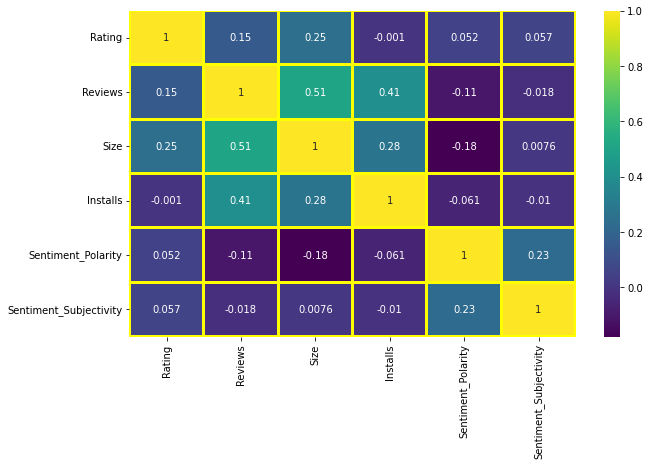

In [60]:
plt.figure(figsize =(10,6))
sns.heatmap(review_corr, annot = True, linewidths= 2, linecolor= 'yellow',cmap ='viridis')

Distribution of Sentiment Subjectivity

Text(0.5, 1.0, 'Distribution of Subjectivity')

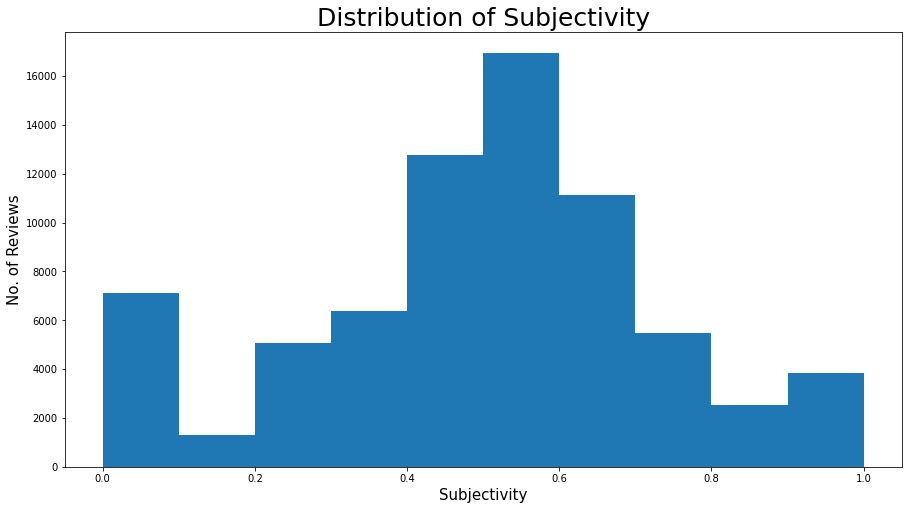

In [68]:
plt.figure(figsize =(15,8))
plt.hist(app_review_df.loc[~app_review_df['Sentiment_Subjectivity'].isnull(),'Sentiment_Subjectivity'])
plt.xlabel('Subjectivity',fontsize=15)
plt.ylabel('No. of Reviews',fontsize=15)
plt.title('Distribution of Subjectivity',size = 25)